# Exploring the NL Central with pybaseball

A brief analysis and visualization of the NL Central division in 2022. Teams: Brewers, Cardinals, Cubs, Pirates, and Reds.

In [1]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Get all NL Central Team Records for 2022
year = 2022
brewers = pyball.schedule_and_record(year, 'MIL')
cardinals = pyball.schedule_and_record(year, 'STL')
cubs = pyball.schedule_and_record(year, 'CHC')
pirates = pyball.schedule_and_record(year, 'PIT')
reds = pyball.schedule_and_record(year, 'CIN')

## Summary Statistics
A quick glance at the summary statistics for each team. Since this season is ongoing, the order is not important. Note that the Brewers offence is performing the best and the Reds the worst, as expected. However, Reds pitching has been a struggle, allowing 6 runs per game on average. The Cardinals are allowing the fewest at 3.4 compared to the elite pitching staff of the Brewers at 3.7.



In [3]:
brewers.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,30.000000,30.000000,30.0,30.000000,30.000000,30.000000
mean,4.766667,3.733333,9.0,2.066667,25837.266667,0.966667
std,4.014485,2.827614,0.0,1.284747,10289.776942,2.157318
min,0.000000,0.000000,9.0,1.000000,8331.000000,-3.000000
25%,2.000000,2.000000,9.0,1.000000,21267.500000,-1.000000
50%,4.500000,3.000000,9.0,1.500000,26265.500000,1.000000
75%,6.000000,4.750000,9.0,3.000000,34548.500000,2.750000
max,18.000000,10.000000,9.0,5.000000,44461.000000,5.000000


In [4]:
cubs.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.892857,4.392857,8.928571,2.785714,31848.964286,-0.964286
std,3.993878,2.922952,0.604218,1.166100,6331.793658,1.933757
min,0.000000,0.000000,6.000000,1.000000,9122.000000,-5.000000
25%,1.750000,2.750000,9.000000,2.000000,28893.250000,-2.000000
50%,3.000000,4.000000,9.000000,3.000000,32599.500000,-1.000000
75%,5.000000,6.000000,9.000000,4.000000,35685.250000,1.000000
max,21.000000,11.000000,10.000000,4.000000,41595.000000,2.000000


In [5]:
cardinals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000
mean,4.321429,3.464286,9.0,1.500000,30249.642857,0.285714
std,3.255236,3.072966,0.0,0.509175,11524.832333,1.629750
min,0.000000,0.000000,9.0,1.000000,8475.000000,-3.000000
25%,1.750000,1.000000,9.0,1.000000,22891.250000,-1.000000
50%,4.000000,3.000000,9.0,1.500000,32839.500000,1.000000
75%,7.000000,5.000000,9.0,2.000000,40120.750000,2.000000
max,10.000000,13.000000,9.0,2.000000,46256.000000,3.000000


In [6]:
pirates.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,28.000000,28.000000,28.000000,28.000000,27.000000,28.000000
mean,3.821429,5.285714,9.035714,3.321429,20040.703704,-0.428571
std,2.735955,3.989404,0.188982,0.669636,12466.707593,1.665079
min,0.000000,1.000000,9.000000,2.000000,8331.000000,-4.000000
25%,2.000000,3.000000,9.000000,3.000000,8928.500000,-1.250000
50%,3.000000,4.000000,9.000000,3.000000,17623.000000,-1.000000
75%,6.000000,6.250000,9.000000,4.000000,26696.000000,1.000000
max,9.000000,21.000000,10.000000,5.000000,46256.000000,2.000000


In [7]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,29.000000,29.000000,29.0,29.000000,29.000000,28.000000
mean,3.793103,6.344828,9.0,4.586207,28364.137931,-3.821429
std,2.554818,3.538319,0.0,0.982607,13387.169363,3.830226
min,0.000000,1.000000,9.0,1.000000,9192.000000,-11.000000
25%,2.000000,4.000000,9.0,5.000000,20470.000000,-7.000000
50%,4.000000,6.000000,9.0,5.000000,28598.000000,-3.500000
75%,5.000000,9.000000,9.0,5.000000,40234.000000,-1.000000
max,10.000000,18.000000,9.0,5.000000,52995.000000,2.000000


## A look at Wins, Win Percentages, and Games Back
Comparing the wins, win percentages, and games back for each team of the NL Central

First we gather each team's Wins, Losses, and Win Percentages at the time of each game

In [8]:
# Gets wins-to-date, losses-to-date, and win_percent-to-date for each team
brewers['Wins'] = np.where(brewers['W/L']=='W', 1, (np.where(brewers['W/L']=='W-wo', 1, 0))).cumsum()
brewers['Losses'] = np.where(brewers['W/L']=='L', 1, (np.where(brewers['W/L']=='L-wo', 1, 0))).cumsum()
brewers['Win_Percentage'] = brewers['Wins'] / (brewers['Wins'] + brewers['Losses'])

cubs['Wins'] = np.where(cubs['W/L']=='W', 1, (np.where(cubs['W/L']=='W-wo', 1, 0))).cumsum()
cubs['Losses'] = np.where(cubs['W/L']=='L', 1, (np.where(cubs['W/L']=='L-wo', 1, 0))).cumsum()
cubs['Win_Percentage'] = cubs['Wins'] / (cubs['Wins'] + cubs['Losses'])

cardinals['Wins'] = np.where(cardinals['W/L']=='W', 1, (np.where(cardinals['W/L']=='W-wo', 1, 0))).cumsum()
cardinals['Losses'] = np.where(cardinals['W/L']=='L', 1, (np.where(cardinals['W/L']=='L-wo', 1, 0))).cumsum()
cardinals['Win_Percentage'] = cardinals['Wins'] / (cardinals['Wins'] + cardinals['Losses'])

pirates['Wins'] = np.where(pirates['W/L']=='W', 1, (np.where(pirates['W/L']=='W-wo', 1, 0))).cumsum()
pirates['Losses'] = np.where(pirates['W/L']=='L', 1, (np.where(pirates['W/L']=='L-wo', 1, 0))).cumsum()
pirates['Win_Percentage'] = pirates['Wins'] / (pirates['Wins'] + pirates['Losses'])

reds['Wins'] = np.where(reds['W/L']=='W', 1, (np.where(reds['W/L']=='W-wo', 1, 0))).cumsum()
reds['Losses'] = np.where(reds['W/L']=='L', 1, (np.where(reds['W/L']=='L-wo', 1, 0))).cumsum()
reds['Win_Percentage'] = reds['Wins'] / (reds['Wins'] + reds['Losses'])

### Graphing Wins and Win Percentages
Here we can see that the win tracking is quite blocky early into the season, but the Brewers are jumping out to the lead with the Cardinals hanging in there. The Pirates, Cubs, and Reds are all struggling to keep up.

Text(0.5, 1.0, 'NL Central Wins Comparison (2022)')

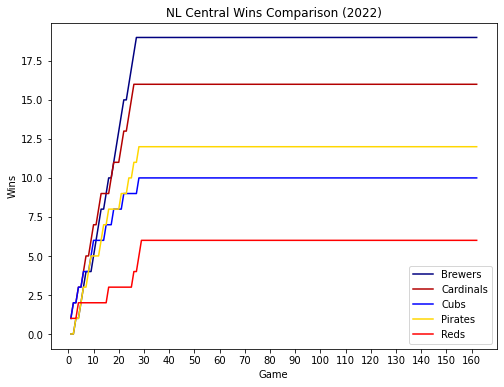

In [10]:
# Graph Wins Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Wins'], label='Brewers', c='navy')
plt.plot(cardinals['Wins'], label='Cardinals', c='#b30000')
plt.plot(cubs['Wins'], label='Cubs', c='blue')
plt.plot(pirates['Wins'], label='Pirates', c='gold')
plt.plot(reds['Wins'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("NL Central Wins Comparison ({})".format(year))

Text(0.5, 1.0, 'NL Central Win Percentage Comparison (2022)')

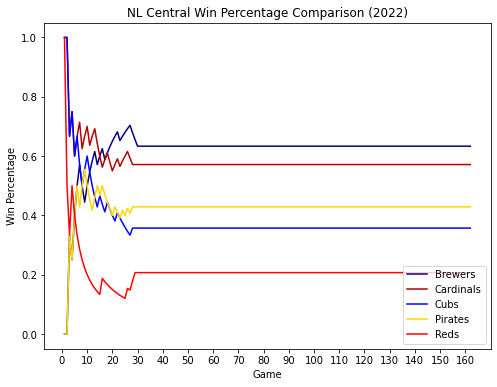

In [11]:
# Graph Win Percentage Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Win_Percentage'], label='Brewers', c='navy')
plt.plot(cardinals['Win_Percentage'], label='Cardinals', c='#b30000')
plt.plot(cubs['Win_Percentage'], label='Cubs', c='blue')
plt.plot(pirates['Win_Percentage'], label='Pirates', c='gold')
plt.plot(reds['Win_Percentage'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')

plt.title("NL Central Win Percentage Comparison ({})".format(year))

### Graphing Games Back

First we create a modified column to numerically represent 'Games Back'

In [12]:
# Insert new column called 'int_GB' that represents GB as either negative (meaning behind) or 0.0 meaning in first or tied for first
def modify_gb(gb):
    if gb == 'Tied':
        gb = 0.0
    elif 'up' in gb:
        gb = 0.0 # float(gb.replace('up ', ''))
    else:
        gb = -float(gb)
    
    return gb
    
brewers['int_GB'] = brewers['GB'].dropna().apply(modify_gb)
cardinals['int_GB'] = cardinals['GB'].dropna().apply(modify_gb)
cubs['int_GB'] = cubs['GB'].dropna().apply(modify_gb)
pirates['int_GB'] = pirates['GB'].dropna().apply(modify_gb)
reds['int_GB'] = reds['GB'].dropna().apply(modify_gb)

#### What the Graph Shows
Graphing 'Games Back' gives an even clearer image of how the NL Central competition is shaping up. 

The Cardinals are keeping pace with the Brewers in spurts, but the most recent losses for the Brewers resulted in a GB reduction. Clearly, there is a long way to go.

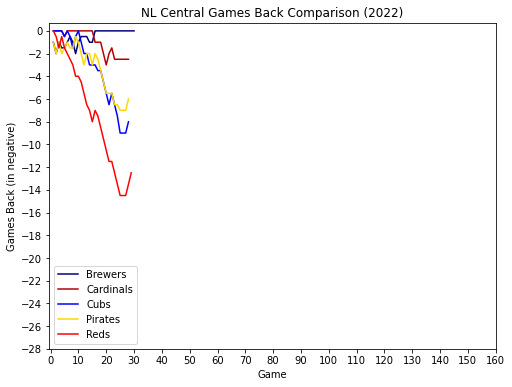

In [13]:
# Graph NL Central Games Back Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['int_GB'], label='Brewers', c='navy')
plt.plot(cardinals['int_GB'], label='Cardinals', c='#b30000')
plt.plot(cubs['int_GB'], label='Cubs', c='blue')
plt.plot(pirates['int_GB'], label='Pirates', c='gold')
plt.plot(reds['int_GB'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.yticks(np.arange(0, -30, step=-2))
plt.xlabel('Game')
plt.ylabel('Games Back (in negative)')

plt.title("NL Central Games Back Comparison ({})".format(year))
plt.legend(loc='lower left')

## Graphing Total Runs and Runs Allowed

First we create new columns for Total Runs, and Total Runs Allowed

In [14]:
# Get total runs-to-date and total runs_allowed-to-date for each team
brewers['Total_Runs'] = brewers['R'].cumsum()
brewers['Total_RA'] = brewers['RA'].cumsum()

cubs['Total_Runs'] = cubs['R'].cumsum()
cubs['Total_RA'] = cubs['RA'].cumsum()

cardinals['Total_Runs'] = cardinals['R'].cumsum()
cardinals['Total_RA'] = cardinals['RA'].cumsum()

pirates['Total_Runs'] = pirates['R'].cumsum()
pirates['Total_RA'] = pirates['RA'].cumsum()

reds['Total_Runs'] = reds['R'].cumsum()
reds['Total_RA'] = reds['RA'].cumsum()

#### What the Graph Shows
Graphing Runs and Runs Allowed illustrates some of the causal factors in each teams divisional rank.

The Brewers offense has separated themselves over the last 5-10 games in terms of runs scored. Interestingly, the rest of the pack is rather bunched up at the moment. The Cardinals pitching staff was off to a great start, and has managed to stay just ahead of the Brewers after some recent high scoring affairs in Milwaukee.

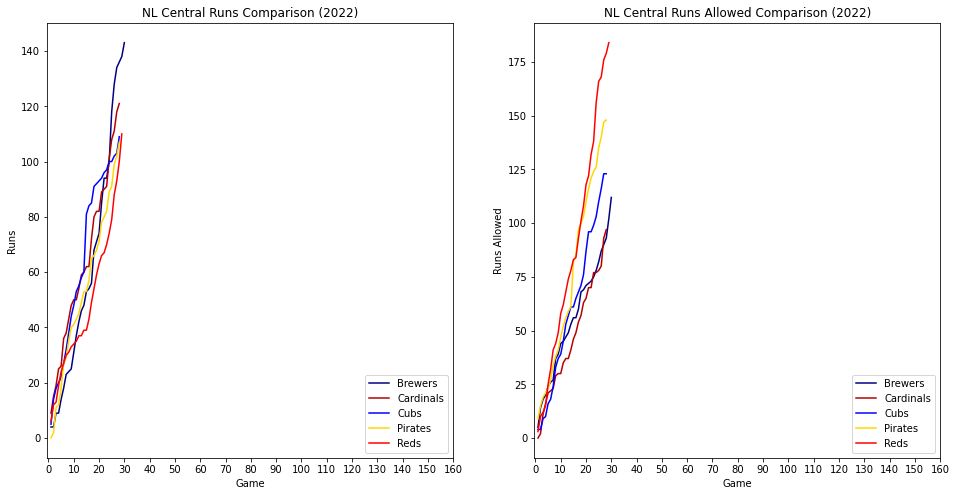

In [15]:
# Graph Runs and Runs Allowed Comparisons #
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
plt.plot(brewers['Total_Runs'], label='Brewers', c='navy')
plt.plot(cardinals['Total_Runs'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_Runs'], label='Cubs', c='blue')
plt.plot(pirates['Total_Runs'], label='Pirates', c='gold')
plt.plot(reds['Total_Runs'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs')

plt.title("NL Central Runs Comparison ({})".format(year))
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(brewers['Total_RA'], label='Brewers', c='navy')
plt.plot(cardinals['Total_RA'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_RA'], label='Cubs', c='blue')
plt.plot(pirates['Total_RA'], label='Pirates', c='gold')
plt.plot(reds['Total_RA'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs Allowed')

plt.title("NL Central Runs Allowed Comparison ({})".format(year))
plt.legend(loc='lower right')

### Graphing Total Home Attendance
For fun, we take a look at each teams total home attendance throughout the season.

First we get each teams total home_attendance-to-date

In [16]:
brewers['Total_Home_Attendance'] = brewers[brewers['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cubs['Total_Home_Attendance'] = cubs[cubs['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cardinals['Total_Home_Attendance'] = cardinals[cardinals['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
pirates['Total_Home_Attendance'] = pirates[pirates['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
reds['Total_Home_Attendance'] = reds[reds['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()

#### What the Graph Shows
The Reds and Pirates saw dramatically less people come to the ballpark compared to the rest of the division, with the Pirates coming in last despite the poor performance in Cincinnati. That performance is having an effect as the Reds attendance is trending down.

The Cubs are also beating out the Brewers. Given Miller Park's capacity (41,900) and Wrigley Field's Capacity (41,649), this seems to show a greater interest from Cubs fans than Brewers fans. Of course, Chicago is the bigger city.

The Cardinals come in first in attendance. This may be caused by Busch Stadium's slightly larger capacity of 49,676, though St. Louis also has the fewest home games at this point in the season.

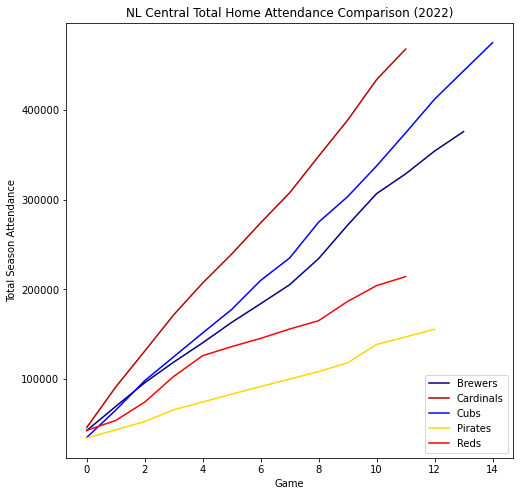

In [17]:
# Graph Total Home Attendance Comparison #
plt.rcParams["figure.figsize"] = (8,8)

# Create new Series for home attendance #
brewers_attendance = brewers['Total_Home_Attendance'].dropna()
brewers_attendance.index = range(len(brewers_attendance))

cardinals_attendance = cardinals['Total_Home_Attendance'].dropna()
cardinals_attendance.index = range(len(cardinals_attendance))

cubs_attendance = cubs['Total_Home_Attendance'].dropna()
cubs_attendance.index = range(len(cubs_attendance))

pirates_attendance = pirates['Total_Home_Attendance'].dropna()
pirates_attendance.index = range(len(pirates_attendance))

reds_attendance = reds['Total_Home_Attendance'].dropna()
reds_attendance.index = range(len(reds_attendance))

plt.plot(brewers_attendance, label='Brewers', c='navy')
plt.plot(cardinals_attendance, label='Cardinals', c='#b30000')
plt.plot(cubs_attendance, label='Cubs', c='blue')
plt.plot(pirates_attendance, label='Pirates', c='gold')
plt.plot(reds_attendance, label='Reds', c='red')

plt.xlabel('Game')
plt.ylabel('Total Season Attendance')

plt.title("NL Central Total Home Attendance Comparison ({})".format(year))
plt.legend(loc='lower right')